In [20]:
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv('non_linear.csv')

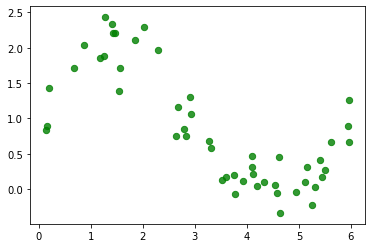

In [27]:
import matplotlib.pyplot as plt

plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha =0.8)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [57]:
def train_polynimial(degree, data):
    """Генерация дотасета и обучение модели"""
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(
        X_valid[:,0][order_test] , y_valid[order_test], 
        40, 'r', 'o', alpha =0.8
    ) 
    print("Норма вектора весов \t |w|=%.2f" % norm(model.coef_))
    #визуализация
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max())
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train,norm(model.coef_)

In [58]:
degrees = []
valid_errors = []
train_errors = []
w_norm = []

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	 |w|=2.19


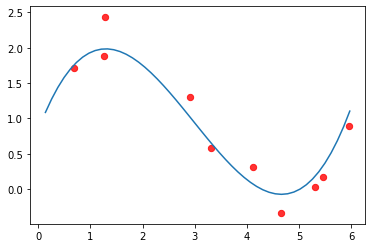

In [59]:
degree = 3

error_valid, error_train, coef_norm = train_polynimial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов 	 |w|=3.31


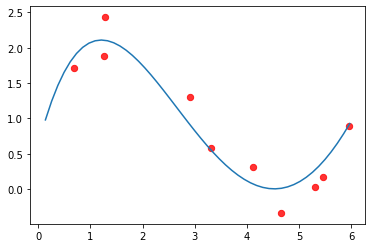

In [60]:
degree = 5

error_valid, error_train, coef_norm = train_polynimial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов 	 |w|=120.14


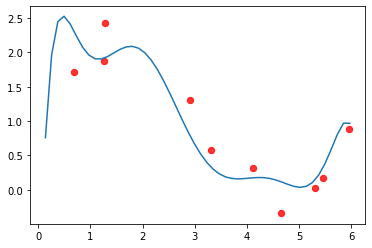

In [61]:
degree = 10

error_valid, error_train, coef_norm = train_polynimial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)